In [8]:
# Imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('../../../')

from src import customFunc as cf
from src import ansatzs as anz

from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

from qiskit.circuit import QuantumCircuit, ParameterVector


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.09051729708407691
Varianza de la derivada: 1.61493299206914e-32

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.03656932402223316
Varianza de la derivada: 1.2534765057065146e-32

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.02027456173133183
Varianza de la derivada: 1.2884596423139184e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.010603180122881667
Varianza de la derivada: 8.055821284135642e-33

Pendiente para valor esperado: -0.3511501871063926.
R^2 para valor esperado: 0.9904883541260726.

Pendiente para derivada: -0.10294621134360753.
R^2 para derivada: 0.834744334072259.


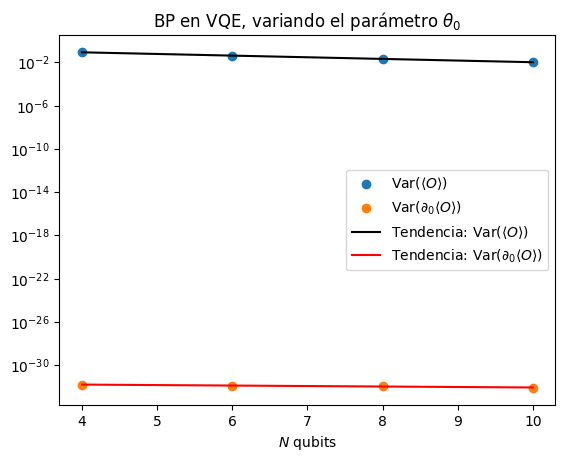

In [ ]:
# Lo mismo que antes pero dejando fijo el número de electrones y escalando los orbitales

obs = FermionicOp({"+_1 -_0": 1.0})
mapper = JordanWignerMapper()
obs_qubit = mapper.map(obs)

def build_UCCSD_ansatz(num_qubits):

    num_spatial_orbitals = num_qubits // 2
    n_alpha = n_beta = 1
    num_particles = (n_alpha, n_beta)

    hf_initial_state = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    ansatz = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=hf_initial_state
    )

    return ansatz, ansatz.num_parameters

# ansatz, num_params = build_UCCSD_ansatz(4, obs_qubit)
# ansatz.decompose().draw("mpl")

data = []
data.append(cf.variance_vs_nQubits(build_UCCSD_ansatz, 4, 10, obs_qubit, 0, 1000, True, True, True, True))


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.005693587398529051
Varianza de la derivada: 0.00012219932079315186

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.00036778979301452637
Varianza de la derivada: 0.00014794521331787112

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.00025636138916015623
Varianza de la derivada: 0.00011767284274101256

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.00021374166011810307
Varianza de la derivada: 0.00010931081175804137

Pendiente para valor esperado: -0.5103953286433818.
R^2 para valor esperado: 0.7351055448816255.

Pendiente para derivada: -0.02816541552149676.
R^2 para derivada: 0.31757032538791374.


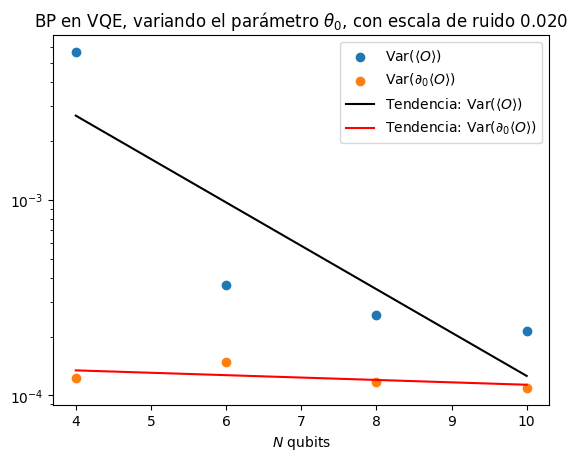

In [3]:
# Observable
obs = FermionicOp({"+_1 -_0": 1.0})
mapper = JordanWignerMapper()
obs_qubit = mapper.map(obs)

# Ansatz
def build_UCCSD_ansatz(num_qubits):

    num_spatial_orbitals = num_qubits // 2
    n_alpha = n_beta = 1
    num_particles = (n_alpha, n_beta)

    hf_initial_state = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    ansatz = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=hf_initial_state
    )

    return ansatz, ansatz.num_parameters


# Análisis del ruido
from qiskit.providers.fake_provider import FakeMontreal
fake_backend = FakeMontreal()
data_noise = []

data_noise.append(cf.noisy_variance_vs_nQubits(build_UCCSD_ansatz, fake_backend, 0.02, 4, 10, obs_qubit, 0, 100, print_info=True, plot_info=True, do_regress=True, only_even_qubits=True))

In [5]:
print(data_noise)

[{'n_qubits': [4, 6, 8, 10], 'var_value': [0.005693587398529051, 0.00036778979301452637, 0.00025636138916015623, 0.00021374166011810307], 'var_deriv': [0.00012219932079315186, 0.00014794521331787112, 0.00011767284274101256, 0.00010931081175804137], 'value_slope': -0.5103953286433818, 'value_ord': -3.876252362831899, 'value_rsquare': 0.7351055448816255, 'deriv_slope': -0.02816541552149676, 'deriv_ord': -8.802202880123463, 'deriv_rsquare': 0.31757032538791374}]



Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.13150563405761556
Varianza de la derivada: 3.215511642512535e-31

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04626414093254317
Varianza de la derivada: 4.162922218992578e-31

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.02085348719124095
Varianza de la derivada: 3.8866644010979435e-31

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.019723520978979423
Varianza de la derivada: 3.6632878585773596e-31

Pendiente para valor esperado: -0.3244279710807865.
R^2 para valor esperado: 0.8913162785098138.

Pendiente para derivada: 0.01612288808644351.
R^2 para derivada: 0.14423378439254078.


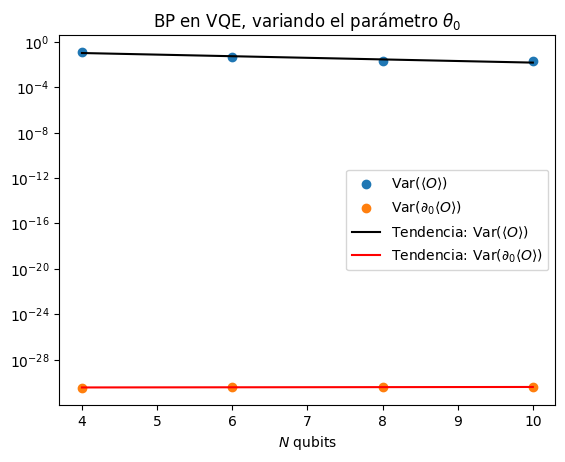

In [39]:
with open(f"data/hamiltonian_H2_0.700.pkl", "rb") as f:
    obs_qubit = pickle.load(f)

def build_k_UCCSD_ansatz(num_qubits, k=5, mapper=JordanWignerMapper()):
    num_spatial_orbitals = num_qubits // 2
    n_alpha = n_beta = 1
    num_particles = (n_alpha, n_beta)

    # Estado inicial Hartree-Fock
    hf = HartreeFock(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper
    )

    # Creamos un UCCSD para extraer el número de parámetros
    uccsd_template = UCCSD(
        num_spatial_orbitals=num_spatial_orbitals,
        num_particles=num_particles,
        qubit_mapper=mapper,
        initial_state=None
    )
    
    # Forzamos construcción del circuito
    _ = uccsd_template.decompose()  # <--- esto construye internamente los operadores y parámetros

    # Obtenemos el número de parámetros
    num_params = len(uccsd_template.parameters)

    # Inicializamos circuito completo
    full_ansatz = QuantumCircuit(num_qubits)
    full_ansatz.compose(hf, inplace=True)

    all_parameters = []

    # Añadimos k capas de UCCSD
    for i in range(k):
        theta = ParameterVector(f'theta_{i}', num_params)
        all_parameters.extend(theta)

        ucc_i = UCCSD(
            num_spatial_orbitals=num_spatial_orbitals,
            num_particles=num_particles,
            qubit_mapper=mapper,
            initial_state=None
        )
        _ = ucc_i.decompose()  # <- de nuevo, forzamos construcción para tener acceso a parameters
        ucc_i = ucc_i.assign_parameters(dict(zip(ucc_i.parameters, theta)))

        full_ansatz.compose(ucc_i, inplace=True)

    return full_ansatz, full_ansatz.num_parameters


data = []
data.append(cf.variance_vs_nQubits(build_k_UCCSD_ansatz, 4, 10, obs_qubit, 0, 1000, True, True, True, True))

-0.26002998207047967


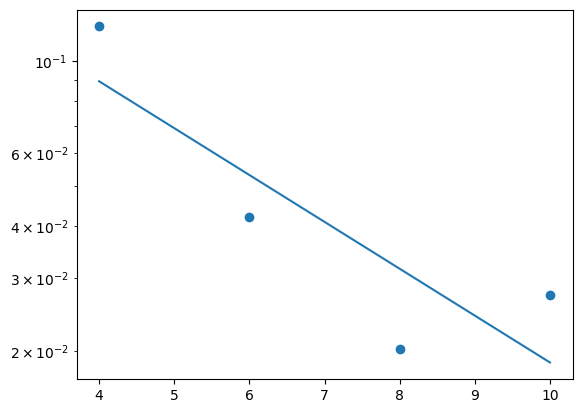

In [38]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

y_log = np.log(data[0]['var_value'])
regress_result = linregress(data[0]['n_qubits'], y_log)
print(regress_result.slope)

plt.scatter(data[0]['n_qubits'], data[0]['var_value'])
plt.yscale('log')

x = np.linspace(4, 10, 10)
y = np.exp(x*regress_result.slope+regress_result.intercept)
plt.plot(x,y)